# Klasifikatoriai

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
heart = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/heart.csv')

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


![](https://www.indushealthplus.com/media/article_img/heart-attack-facts-awareness-thumb.jpg)

# Užduotis

Dirbsime su širdies ligų duomenimis. Turime lentelę, kurios kintamieji yra paciento duomenys ir klinikiniai rodikliai, o stulpelis target rodo, ar turi pacientas širdies ligą, ar ne. Išanalizuokite duomenis, ir sukurkite 4 modelius, kurie bandys 'diagnozuoti' širdies veiklos sutrikimus. Darbo eiga(apytikriai):
* importuokite bibliotekas, nuskaitykite csv failą (copy paste iš šio dokumento)
* išanalizuokite duomenis, atsispausdinkite keletą, jūsų nuomone, svarbių diagramų.
* patikrinkite, ar duomenyse yra trūkstamų reikšmių, jeigu yra, sutvarkykite.
* paruoškite duomenis modelio apmokymui
* apmokykite LogisticRegression, DecisionTree, RandomForests modelius, nustatykite jų efektyvumą, atsispausdinkite *confusion* matricas.
* pasidarykite lentelės kopiją, ir jos pagrindu paruoškite duomenis KNearestNeighbor klasifikatoriui.
* apmokykite KNN, nustatykite jo efektyvumą, atsispausdinkite *confusion* matricą.
* kuris modelis efektyviausias? Palyginkite *confusion* matricas, įvertinkite, kuri pozicija jose gali būti svarbesnė už patį modelio efektyvumą (hint hint - neteisingos diagnozės..)

Stulpelių paaiškinimai anglų kalba:

> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

*dėl medicinos terminų nesijaudinkite, mums tikrai nereikia visko suprasti :)*

In [11]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='age', ylabel='trestbps'>

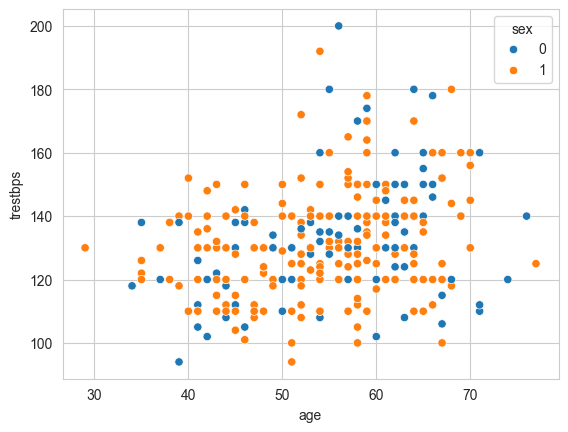

In [20]:
sns.scatterplot(x='age', y='trestbps', data=heart, hue='sex')

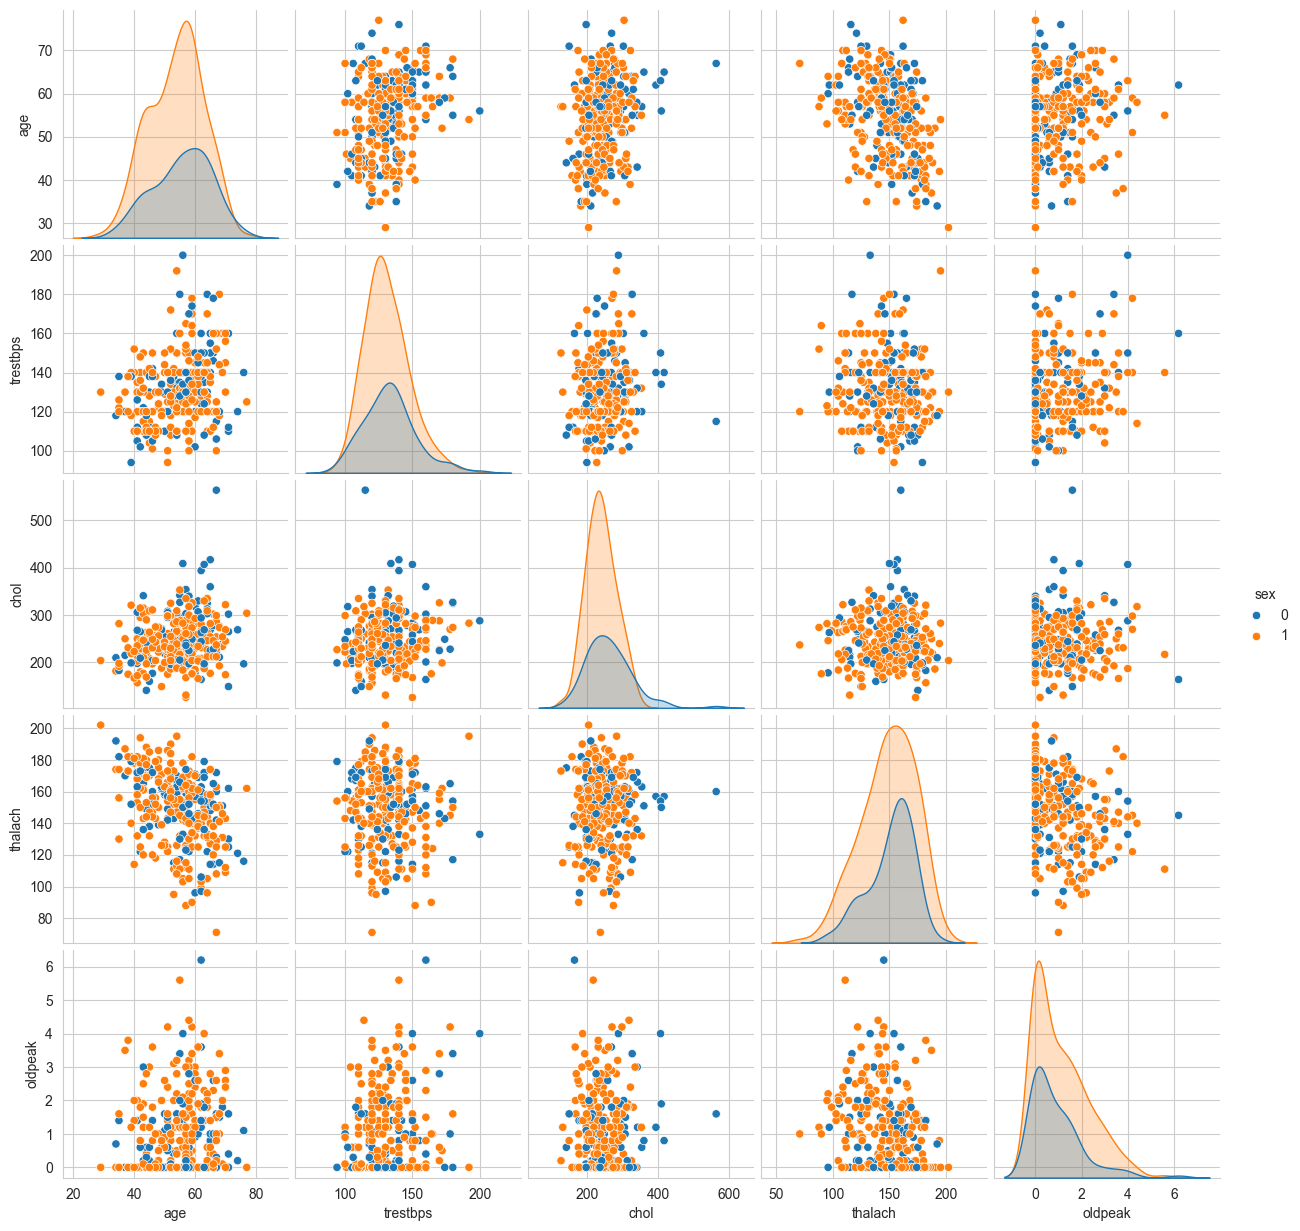

In [23]:
sns.pairplot(heart.drop(columns= ['target', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']), hue='sex')

In [24]:
lele_cp = pd.get_dummies(heart['cp'])
lele_cp.columns = ['cp0', 'cp1', 'cp2', 'cp3']
lele_slope = pd.get_dummies(heart['slope'])
lele_slope.columns = ['slope0', 'slope1', 'slope2']
lele_ca = pd.get_dummies(heart['ca'])
lele_ca.columns = ['ca0', 'ca1', 'ca2', 'ca3', 'ca4']
lele_thal = pd.get_dummies(heart['thal'])
lele_thal.columns = ['thal0','thal1', 'thal2', 'thal3']

In [26]:
leles = pd.concat([lele_ca, lele_cp, lele_slope, lele_thal], axis=1)
leles.head()

,ca0,ca1,ca2,ca3,ca4,cp0,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False
1,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
4,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False


In [28]:
heart.drop(columns=['ca', 'cp', 'slope', 'thal'], inplace=True)
new_heart = pd.concat([heart, leles], axis=1)
new_heart.head()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,1,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,1,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,1,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,1,...,True,False,False,False,False,True,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,1,...,False,False,False,False,False,True,False,False,True,False


In [29]:
horizontal = new_heart.drop('target', axis=1)
horizontal.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca0,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,True,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,True,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,True,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,True,...,True,False,False,False,False,True,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,True,...,False,False,False,False,False,True,False,False,True,False


In [30]:
vertical = new_heart['target']
vertical.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(horizontal, vertical, test_size=0.4, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X_train, y_train)

c:\Users\woite\Documents\CodeAcademy\course-python-basic-main\course-python-basic\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
model1.score(X_train, y_train)

0.8729281767955801

In [34]:
logic_predict = model1.predict(X_test)
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, logic_predict)
lr_cm

array([[44,  8],
       [ 6, 64]], dtype=int64)

In [38]:
arr = np.array([10, 15, 20, 25, 30, 35, 40])

print(arr[::2])

[10 20 30 40]
